In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
main_directory='/content/drive/My Drive'

In [5]:
import pandas as pd 
df=pd.read_csv(main_directory+'/car_evaluation.csv', names=['Buying', 'Maint_cost', 'Doors', 'Persons', 'Lug_boot', 'Safety', 'Over_all_score'], index_col=None)
df.head(10)

,Buying,Maint_cost,Doors,Persons,Lug_boot,Safety,Over_all_score
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Buying          1728 non-null   object
 1   Maint_cost      1728 non-null   object
 2   Doors           1728 non-null   object
 3   Persons         1728 non-null   object
 4   Lug_boot        1728 non-null   object
 5   Safety          1728 non-null   object
 6   Over_all_score  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
df.isnull().sum()

Buying            0
Maint_cost        0
Doors             0
Persons           0
Lug_boot          0
Safety            0
Over_all_score    0
dtype: int64

In [8]:
X = df.drop(['Over_all_score'], axis=1)
Y = df['Over_all_score']

In [9]:
X.head(5)

,Buying,Maint_cost,Doors,Persons,Lug_boot,Safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [10]:
pip install --upgrade category_encoders

     |████████████████████████████████| 80 kB 4.0 MB/s 


In [11]:
import category_encoders as ce

encoder_features = ce.OrdinalEncoder(cols=['Buying', 'Maint_cost', 'Doors', 'Persons', 'Lug_boot', 'Safety'])
encoder_class = ce.OrdinalEncoder(cols=['Over_all_score'])

X = encoder_features.fit_transform(X)

Y = encoder_class.fit_transform(Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [12]:
X

,Buying,Maint_cost,Doors,Persons,Lug_boot,Safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,1,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2
...,...,...,...,...,...,...
1723,4,4,4,3,2,2
1724,4,4,4,3,2,3
1725,4,4,4,3,3,1
1726,4,4,4,3,3,2


In [13]:
print("Before sampling")
print("Features>>>")
[ print(X[column].value_counts(), '\n')  for column in X.columns]
print("Classes>>>")
[ print(Y[column].value_counts(), '\n')  for column in Y.columns]

Before sampling
Features>>>
4    432
3    432
2    432
1    432
Name: Buying, dtype: int64 

4    432
3    432
2    432
1    432
Name: Maint_cost, dtype: int64 

4    432
3    432
2    432
1    432
Name: Doors, dtype: int64 

3    576
2    576
1    576
Name: Persons, dtype: int64 

3    576
2    576
1    576
Name: Lug_boot, dtype: int64 

3    576
2    576
1    576
Name: Safety, dtype: int64 

Classes>>>
1    1210
2     384
4      69
3      65
Name: Over_all_score, dtype: int64 



[None]

In [14]:
from imblearn.combine import SMOTETomek 
smt = SMOTETomek(random_state=42)
X, Y = smt.fit_sample(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

In [15]:
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

In [16]:
print("After sampling>>")
print("Encoded Features>>")
[ print(X[column].value_counts(), '\n')  for column in X.columns]
print("Encoded Classes>>")
[ print(Y[column].value_counts(), '\n')  for column in Y.columns]

After sampling>>
Encoded Features>>
4    1868
3    1715
2     674
1     583
Name: 0, dtype: int64 

3    1653
4    1591
2     974
1     622
Name: 1, dtype: int64 

3    1363
2    1216
1    1161
4    1100
Name: 2, dtype: int64 

2    2488
3    1776
1     576
Name: 3, dtype: int64 

2    1821
3    1768
1    1251
Name: 4, dtype: int64 

3    2612
2    1652
1     576
Name: 5, dtype: int64 

Encoded Classes>>
3    1210
2    1210
1    1210
4    1210
Name: 0, dtype: int64 



[None]

In [17]:
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn import tree

In [18]:
model_params = {
    'svm': {
        'model': SVC(),
        'params' : {
            'C': [10,20,23,],
            'gamma':[0.51,0.52,0.55],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,15],
            'max_features':['auto','sqrt'],
            'max_depth':[2,4,6],
            'min_samples_leaf':[1,2,3]
        }
    },
    'Tree' : {
        'model': tree.DecisionTreeClassifier(),
        'params': {
            'criterion':['gini','entropy'],
            'max_depth':[4,5,6,7,8,9,10,11,12,15]
            
        }
    },
    
}

In [19]:
Y.value_counts()

4    1210
3    1210
2    1210
1    1210
dtype: int64

Best Score obtained by each model

In [70]:
scores = []
for model_name, mp in model_params.items():
    classifier =  GridSearchCV(mp['model'], mp['params'], cv=10,return_train_score=False)
    classifier.fit(X,Y.values.ravel());
    
    scores.append({
        'model': model_name,
        'best_score': classifier.best_score_,
        'best_params': classifier.best_params_
    })
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [73]:
df

,model,best_score,best_params
0,svm,0.969628,"{'C': 10, 'gamma': 0.55, 'kernel': 'rbf'}"
1,random_forest,0.933884,"{'max_depth': 6, 'max_features': 'sqrt', 'min_..."
2,Tree,0.983678,"{'criterion': 'entropy', 'max_depth': 11}"


Individual accuracy and parameters for each model

In [60]:
scores = []
for model_name, mp in model_params.items():
    classifier =  GridSearchCV(mp['model'], mp['params'], cv=10,scoring="accuracy")
    classifier.fit(X,Y.values.ravel());

    # print("Grid result",classifier.cv_results_.keys())
    for i in ['mean_test_score','params']:
        print(i," : ",classifier.cv_results_[i])
    
    scores.append({
        'model': model_name,
        'best_score': classifier.cv_results_['mean_test_score'],
        'params': classifier.cv_results_['params']
    })

mean_test_score  :  [0.96900826 0.86818182 0.96942149 0.86818182 0.9696281  0.86818182
 0.96900826 0.86859504 0.96942149 0.86859504 0.9696281  0.86859504
 0.96900826 0.86880165 0.96942149 0.86880165 0.9696281  0.86880165]
params  :  [{'C': 10, 'gamma': 0.51, 'kernel': 'rbf'}, {'C': 10, 'gamma': 0.51, 'kernel': 'linear'}, {'C': 10, 'gamma': 0.52, 'kernel': 'rbf'}, {'C': 10, 'gamma': 0.52, 'kernel': 'linear'}, {'C': 10, 'gamma': 0.55, 'kernel': 'rbf'}, {'C': 10, 'gamma': 0.55, 'kernel': 'linear'}, {'C': 20, 'gamma': 0.51, 'kernel': 'rbf'}, {'C': 20, 'gamma': 0.51, 'kernel': 'linear'}, {'C': 20, 'gamma': 0.52, 'kernel': 'rbf'}, {'C': 20, 'gamma': 0.52, 'kernel': 'linear'}, {'C': 20, 'gamma': 0.55, 'kernel': 'rbf'}, {'C': 20, 'gamma': 0.55, 'kernel': 'linear'}, {'C': 23, 'gamma': 0.51, 'kernel': 'rbf'}, {'C': 23, 'gamma': 0.51, 'kernel': 'linear'}, {'C': 23, 'gamma': 0.52, 'kernel': 'rbf'}, {'C': 23, 'gamma': 0.52, 'kernel': 'linear'}, {'C': 23, 'gamma': 0.55, 'kernel': 'rbf'}, {'C': 23, '

In [61]:
df = pd.DataFrame(scores,columns=['model','best_score','params'])

In [62]:
result=[]
for i in range(0,3):
  for j in range(0,18):
    result.append({
        'model': df['model'][i],
        'accuracy': df['best_score'][i][j],
        'parameters': df['params'][i][j]
    })
   

In [63]:
Result = pd.DataFrame(result,columns=['model','accuracy','parameters'])

In [64]:
Result

,model,accuracy,parameters
0,svm,0.969008,"{'C': 10, 'gamma': 0.51, 'kernel': 'rbf'}"
1,svm,0.868182,"{'C': 10, 'gamma': 0.51, 'kernel': 'linear'}"
2,svm,0.969421,"{'C': 10, 'gamma': 0.52, 'kernel': 'rbf'}"
3,svm,0.868182,"{'C': 10, 'gamma': 0.52, 'kernel': 'linear'}"
4,svm,0.969628,"{'C': 10, 'gamma': 0.55, 'kernel': 'rbf'}"
5,svm,0.868182,"{'C': 10, 'gamma': 0.55, 'kernel': 'linear'}"
6,svm,0.969008,"{'C': 20, 'gamma': 0.51, 'kernel': 'rbf'}"
7,svm,0.868595,"{'C': 20, 'gamma': 0.51, 'kernel': 'linear'}"
8,svm,0.969421,"{'C': 20, 'gamma': 0.52, 'kernel': 'rbf'}"
9,svm,0.868595,"{'C': 20, 'gamma': 0.52, 'kernel': 'linear'}"


In [74]:
S_V_M=SVC(C=10,gamma=0.55,kernel='rbf')
R_F=RandomForestClassifier(n_estimators= 10,max_depth=6,max_features='sqrt',min_samples_leaf=1)
TR=tree.DecisionTreeClassifier(criterion='entropy',max_depth= 11)

Learning Curve with best parameters

[learning_curve] Training set sizes: [ 435  515  595  675  755  835  915  995 1075 1155 1235 1315 1395 1475
 1555 1635 1715 1795 1875 1955 2035 2115 2195 2275 2355 2435 2515 2595
 2675 2755 2835 2915 2995 3075 3155 3235 3315 3395 3475 3555 3635 3715
 3795 3875 3955 4035 4115 4195 4275 4356]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.4min finished


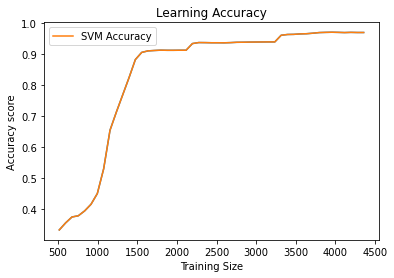

In [91]:
from sklearn.model_selection import learning_curve   
import numpy as np 
from matplotlib import pyplot as plt
train_sizes,train_scores,test_scores=learning_curve(S_V_M,X,Y,cv=10,scoring='accuracy',n_jobs=-1,train_sizes=np.linspace(0.1,1.0,50),verbose=1)
test_mean=np.mean(test_scores,axis=1)
#test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes,test_mean)
plt.title('Learning Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')

plt.plot(train_sizes,test_mean,label='SVM Accuracy')
plt.legend(loc='best')

[learning_curve] Training set sizes: [ 435  515  595  675  755  835  915  995 1075 1155 1235 1315 1395 1475
 1555 1635 1715 1795 1875 1955 2035 2115 2195 2275 2355 2435 2515 2595
 2675 2755 2835 2915 2995 3075 3155 3235 3315 3395 3475 3555 3635 3715
 3795 3875 3955 4035 4115 4195 4275 4356]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   13.4s finished


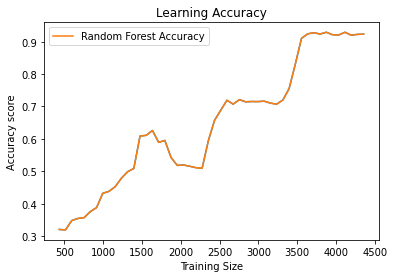

In [92]:
train_sizes,train_scores,test_scores=learning_curve(R_F,X,Y,cv=10,scoring='accuracy',n_jobs=-1,train_sizes=np.linspace(0.1,1.0,50),verbose=1)
test_mean=np.mean(test_scores,axis=1)
#test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes,test_mean)
plt.title('Learning Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')

plt.plot(train_sizes,test_mean,label='Random Forest Accuracy')
plt.legend(loc='best')

[learning_curve] Training set sizes: [ 435  515  595  675  755  835  915  995 1075 1155 1235 1315 1395 1475
 1555 1635 1715 1795 1875 1955 2035 2115 2195 2275 2355 2435 2515 2595
 2675 2755 2835 2915 2995 3075 3155 3235 3315 3395 3475 3555 3635 3715
 3795 3875 3955 4035 4115 4195 4275 4356]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.0s finished


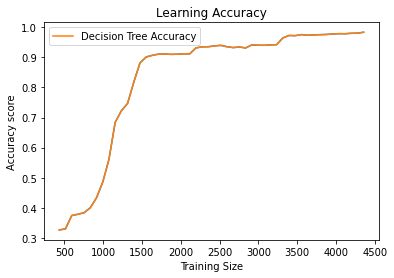

In [93]:
train_sizes,train_scores,test_scores=learning_curve(TR,X,Y,cv=10,scoring='accuracy',n_jobs=-1,train_sizes=np.linspace(0.1,1.0,50),verbose=1)
test_mean=np.mean(test_scores,axis=1)
#test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes,test_mean)
plt.title('Learning Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')

plt.plot(train_sizes,test_mean,label='Decision Tree Accuracy')
plt.legend(loc='best')

Confussion Matrix 

In [96]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sn
SVM_y_pred = cross_val_predict(S_V_M, X, Y.values.ravel(), cv=10)
RF_y_pred = cross_val_predict(R_F,  X, Y.values.ravel(), cv=10)
TR_y_pred = cross_val_predict(TR,  X, Y.values.ravel(), cv=10)
SVM_conf_mat = confusion_matrix(Y.values.ravel(), SVM_y_pred)
RF_conf_mat = confusion_matrix(Y.values.ravel(), RF_y_pred)
TR_conf_mat = confusion_matrix(Y.values.ravel(), TR_y_pred)

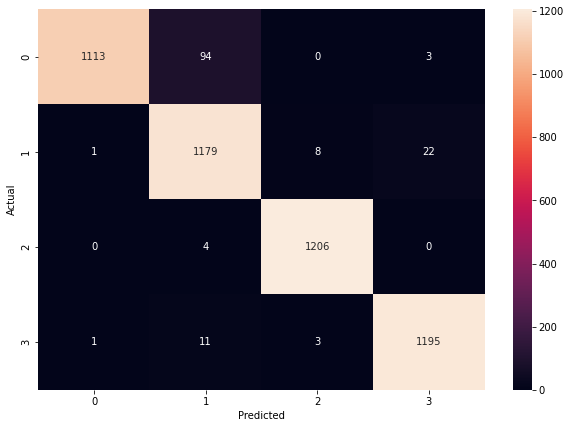

In [97]:
plt.figure(figsize=(10,7))
sn.heatmap(SVM_conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(69.0, 0.5, 'Actual')

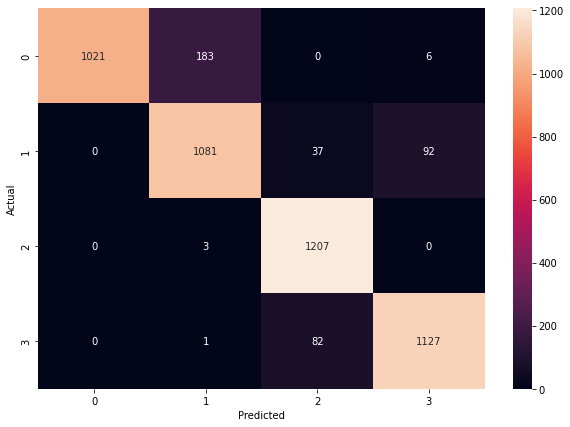

In [98]:
plt.figure(figsize=(10,7))
sn.heatmap(RF_conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(69.0, 0.5, 'Actual')

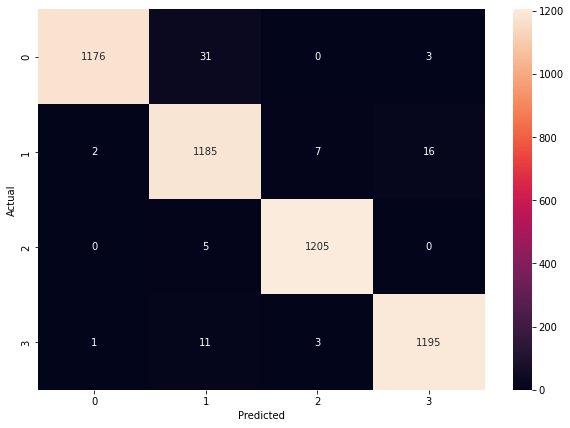

In [99]:
plt.figure(figsize=(10,7))
sn.heatmap(TR_conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')